In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score
from sklearn import linear_model

In [2]:
df= pd.read_csv('Admission_Prediction.csv') # reading the CSV file

In [12]:
df.shape

(500, 9)

In [3]:
df.head() # checking the first five rows from the dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [4]:
df.info() # printing the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [6]:
df.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [7]:
df['GRE Score'].fillna(df['GRE Score'].mode()[0],inplace=True)
df['TOEFL Score'].fillna(df['TOEFL Score'].mode()[0],inplace=True)

In [9]:
df['University Rating'].fillna(df['University Rating'].mean(),inplace=True)

In [10]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12ee606d0>,
      dtype=object)

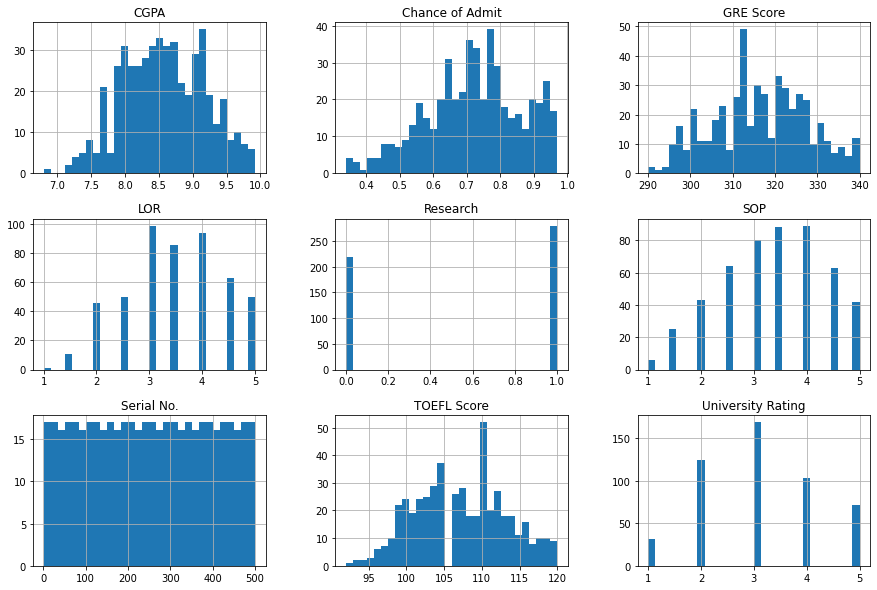

In [58]:
df.hist(bins=30, figsize=(15, 10))

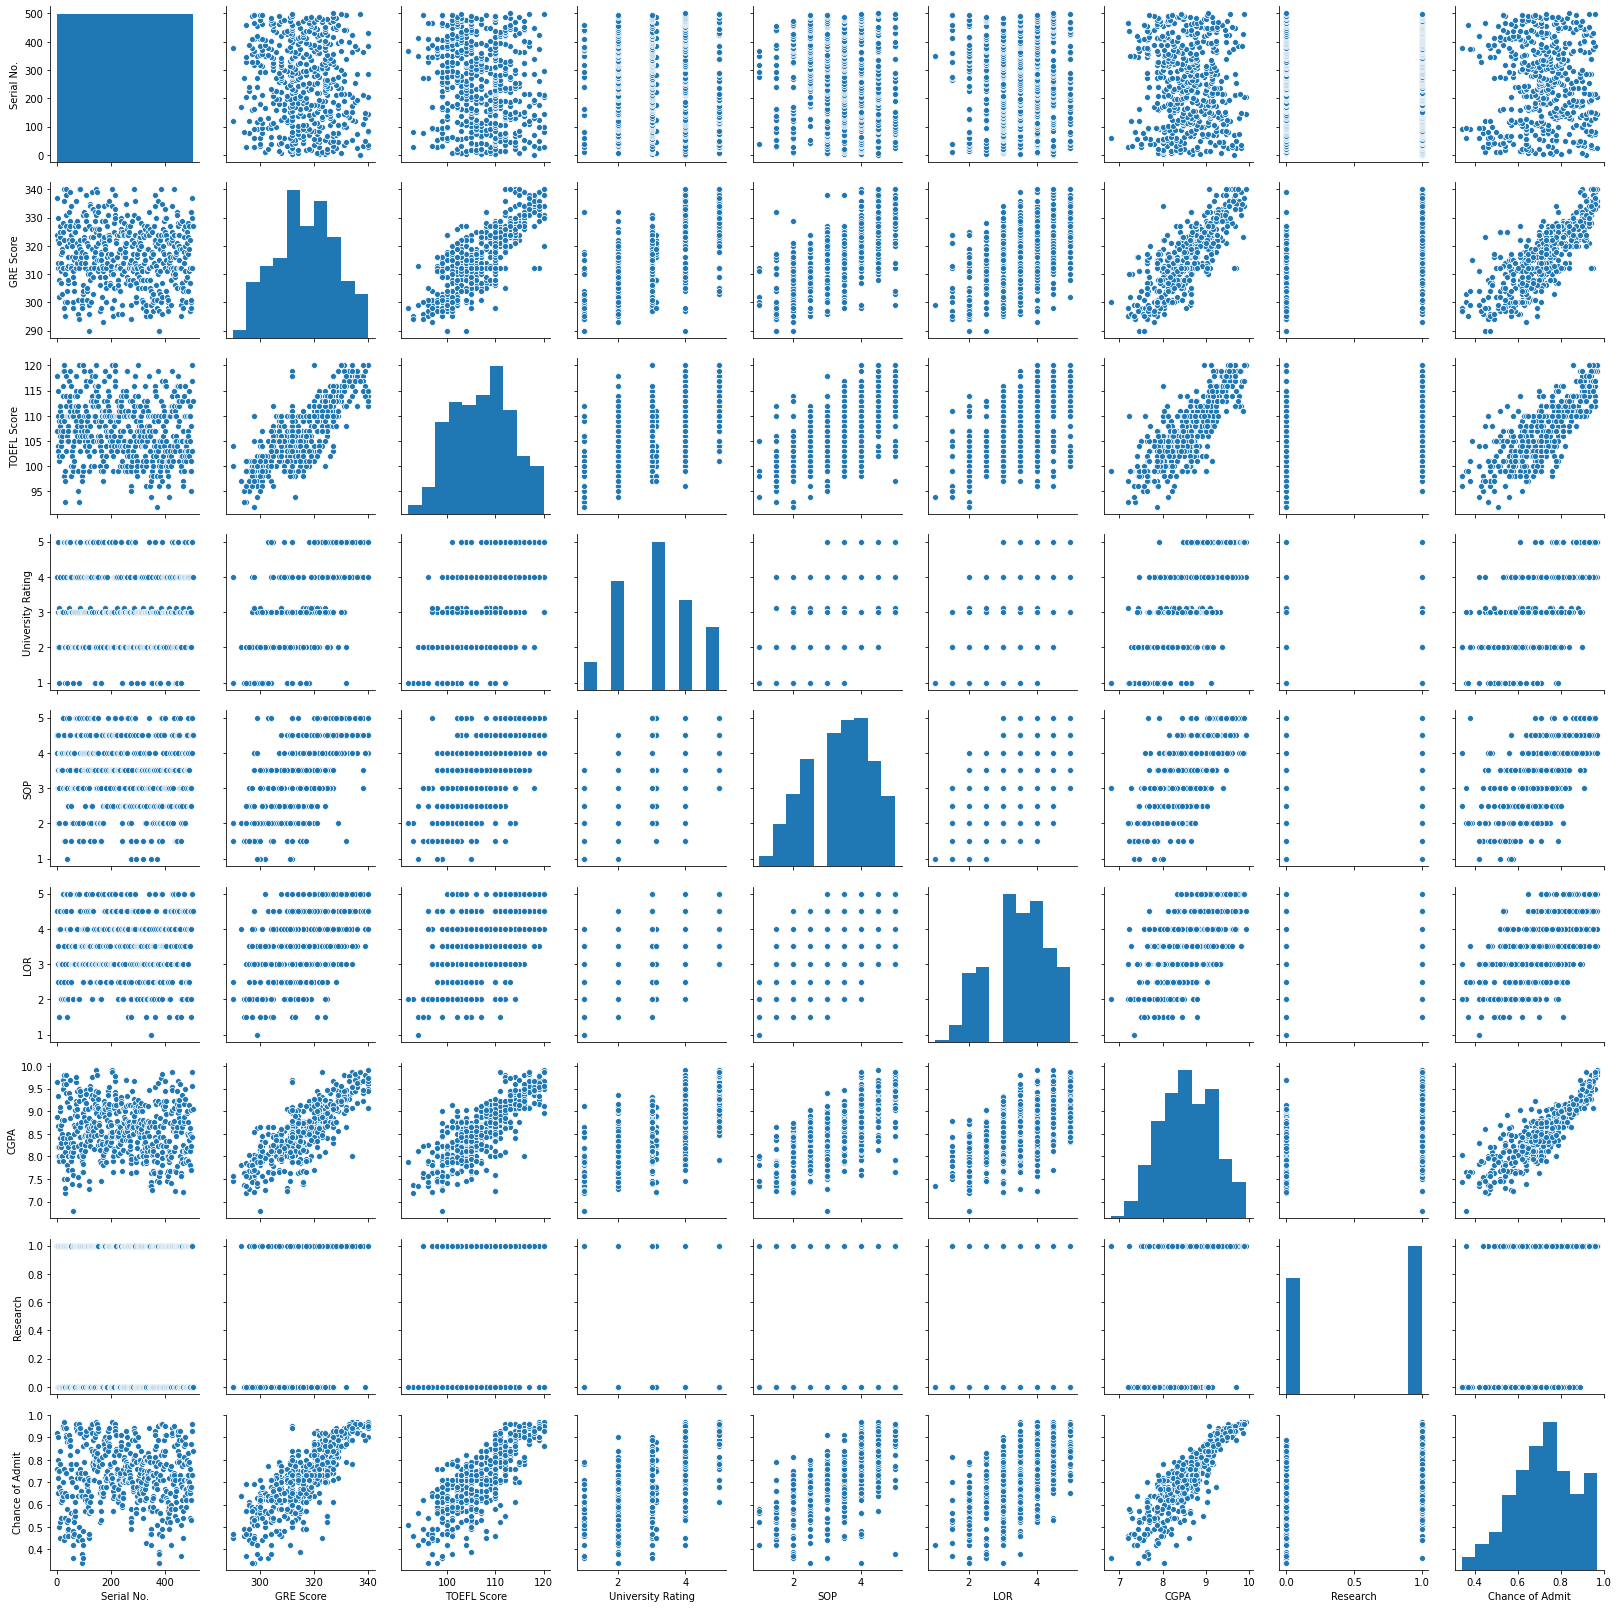

In [70]:
sns.pairplot(df)

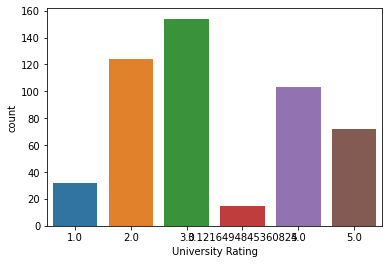

In [71]:
sns.countplot(df['University Rating'])

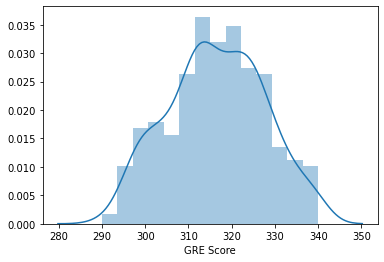

In [11]:
x=df.drop(['Chance of Admit','Serial No.'],axis=1)
y=df['Chance of Admit']

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

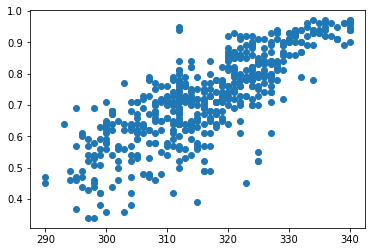

In [16]:
 plt.scatter(df['GRE Score'],y)

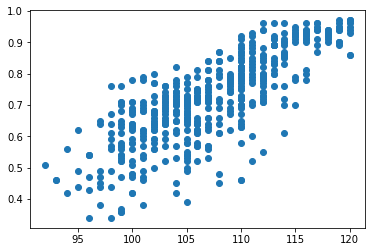

In [18]:
 plt.scatter(df['TOEFL Score'],y) 

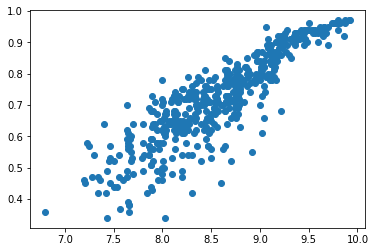

In [19]:
 plt.scatter(df['CGPA'],y) 

In [21]:
reg = linear_model.LinearRegression() 
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
y_pred = reg.predict(x_test)
score= r2_score(y_test,y_pred)

In [26]:
print(score)

0.8165046808869573


In [78]:
print("GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research")
GRE  = int(input("Enter GRE Score 290 - 340"))
TOEFL  = float(input("Enter TOEFL Score 90 - 140"))
University = float(input("University Rating 1-5"))
SOP  = float(input("SOP rating 1-5"))
LOR  = float(input("LOR rating 1-5"))
CGPA  = float(input("CGPA 1-10"))
Research  = float(input("Research Exprience \nPress  0 or No 1 for Yes "))
X= [GRE,TOEFL,University,SOP,LOR,CGPA,Research]
result = reg.predict(numpy.array(X).reshape(1,-1))
result = result*100
print("Chances of getting admission ",result,"%")

GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Enter GRE Score 290 - 340320
Enter TOEFL Score 90 - 140120
University Rating 1-55
SOP rating 1-55
LOR rating 1-55
CGPA 1-109
Research Exprience 
Press  0 or No 1 for Yes 1
Chances of getting admission  [86.2253443] %
